In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster, GroupedLayerControl

from data_utilities import *

# List of Services

0: Boulevard Mowing, Parks and Urban Foresty  
1: Dog Complaint, Animal Services  
2: Frozen Catch Basin, Street Maintenance  
3: Graffiti, Parks and Urban Foresty  
4: Graffiti, Street Maintenance  
5: Litter Container Complaint, Street Maintenance  
6: Missed Garbage Collection, Garbage & Recycling  
7: Missed Recycling Collection, Garbage & Recycling  
8: Mosquito Complaint, Insect Control  
9: Neighbourhood Liveability Complaint, By Law Enforcement  
10: Potholes, Street Maintenance  
11: Sanding, Street Maintenance  
12: Sewer Backup, Sewer & Drainage  
13: Sidewalk Repairs, Street Maintenance  
14: Snow Removal - Roads, Street Maintenance  
15: Snow Removal - Sidewalks, Street Maintenance  
16: Tree Pest Caterpillar Complaint, Insect Control  
17: Water Main Leak, Water  

6: Missed Garbage Collection, Garbage & Recycling  
7: Missed Recycling Collection, Garbage & Recycling  
11: Sanding, Street Maintenance  
16: Tree Pest Caterpillar Complaint, Insect Control  
17: Water Main Leak, Water  

# Temporal

## Overview

### Overall requests by Month

<AxesSubplot: title={'center': 'Overall requests by Month'}, xlabel='Date'>

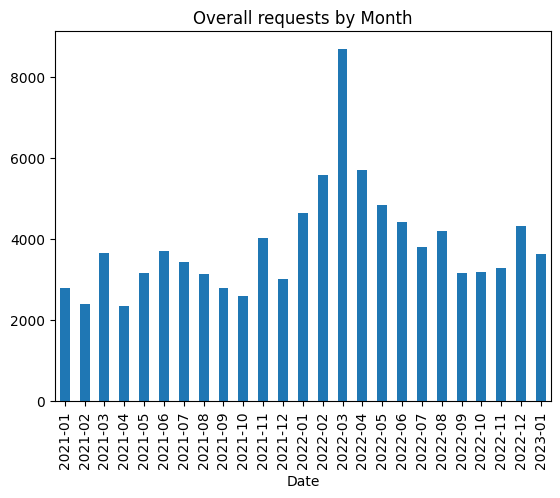

In [7]:
DF.groupby(DF["Date"].dt.to_period("M")).size().plot(kind="bar", title="Overall requests by Month")

In [3]:
def service_by_month(index: int):
    pr = pd.period_range(start=DF["Date"].min().strftime('%Y-%m'), end=DF["Date"].max().strftime('%Y-%m'), freq="M")
    pr = pd.Series(data = [0]*len(pr), index=pd.period_range(start="2021-01", end="2023-01", freq="M"))
    return (pr + DF.query(column_contains("Service Request", [services[index]])).groupby(DF["Date"].dt.to_period("M")).size()).fillna(value=0).astype(int)

def plot_service_divide_by_month_percentage(index: int):
    service_by_month(index).divide(DF.groupby(DF["Date"].dt.to_period("M")).size()).plot(kind="bar", title=services[index])
    plt.show()

def plot_service_divide_by_overall_in_category(index: int):
    service_by_month(index).divide((DF["Service Request"] == services[index]).sum()).plot(kind="bar", title=services[index])
    plt.show()

def plot_service_by_month(index: int, ax = None):
    return service_by_month(index).plot(ax = ax, kind="bar", title=services[index])
    # plt.show()

### Stackplot of requests by Month

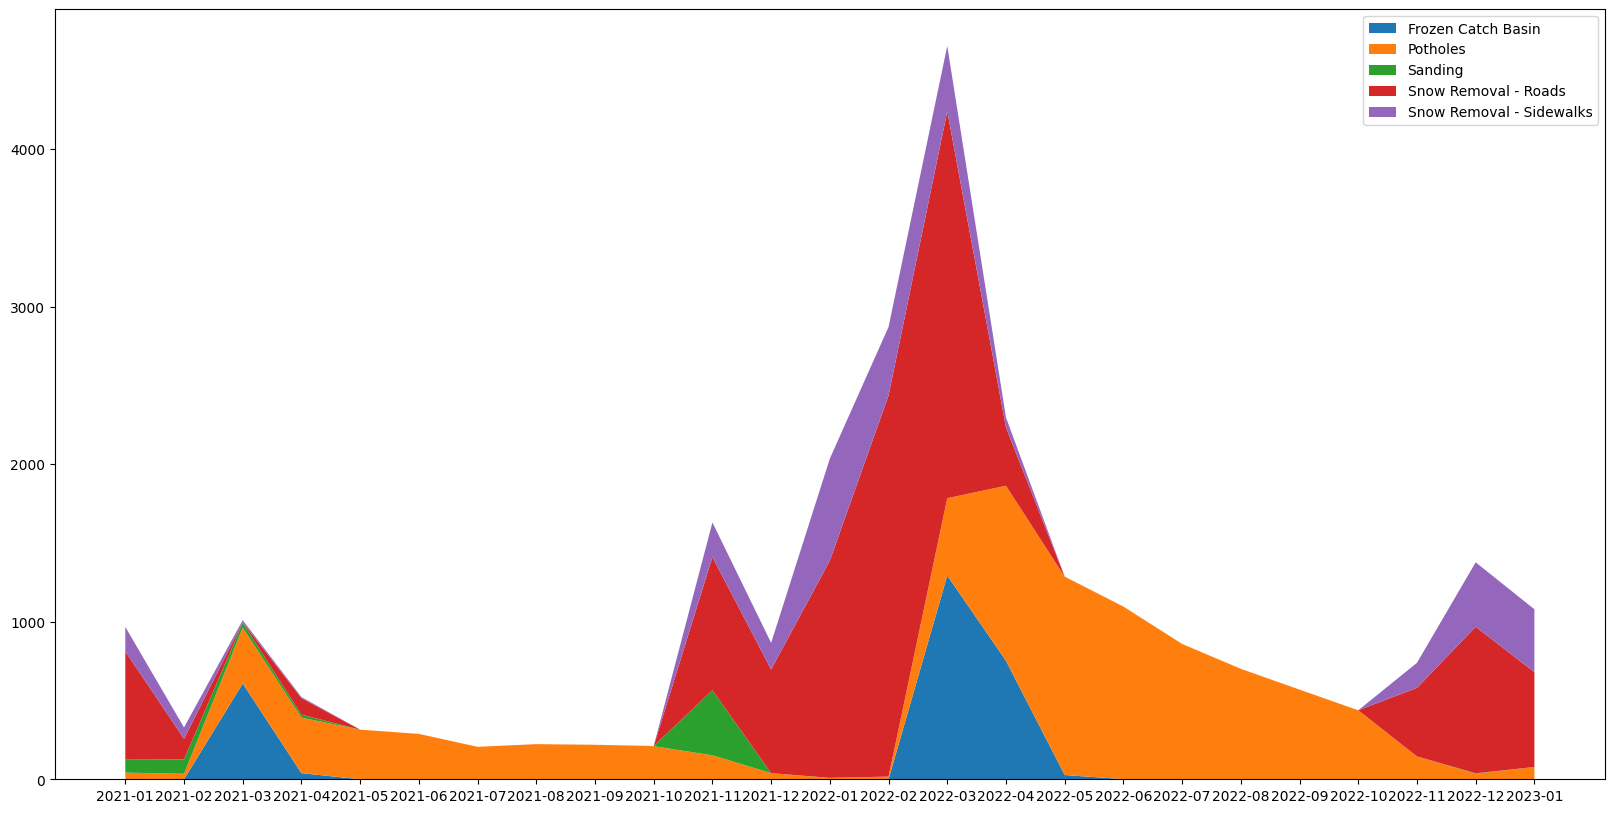

In [10]:
x = [str(period) for period in pd.period_range(start="2021-01", end="2023-01", freq="M")]
y_list = []
select = [2, 10, 11, 14, 15]
for i in select: #range(len(services)):
    y_list.append(service_by_month(i).values)
y = np.vstack(y_list)

# plot
plt.figure(figsize=(20, 10))
plt.stackplot(x, y)

plt.legend([services[i] for i in select])
plt.show()

The data we have here doesn't have anything before the first day of 2021. How unfortunate. 

In [15]:
for i in range(17):
    print(services[i] + ": " + str(len(DF[DF["Service Request"] == services[i]])))

Boulevard Mowing: 533
Dog Complaint: 2237
Frozen Catch Basin: 2720
Graffiti: 3888
Graffiti: 3888
Litter Container Complaint: 997
Missed Garbage Collection: 20746
Missed Recycling Collection: 11599
Mosquito Complaint: 113
Neighbourhood Liveability Complaint: 19204
Potholes: 9240
Sanding: 641
Sewer Backup: 3710
Sidewalk Repairs: 1518
Snow Removal - Roads: 11023
Snow Removal - Sidewalks: 3162
Tree Pest Caterpillar Complaint: 304


In [20]:

# [DF["Date"].dt.year == 2021]
s = 12
delta = len(DF[DF['Date'].dt.year == 2022][DF["Service Request"] == services[s]]) - len(DF[DF['Date'].dt.year == 2021][DF["Service Request"] == services[s]])
total = len(DF[DF["Service Request"] == services[s]])

print(delta, total)

1000 3710


C:\Users\tommy\AppData\Local\Temp\ipykernel_23668\2391521890.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  delta = len(DF[DF['Date'].dt.year == 2022][DF["Service Request"] == services[s]]) - len(DF[DF['Date'].dt.year == 2021][DF["Service Request"] == services[s]])


In [26]:
DF[DF['Date'].dt.year == 2021][DF["Service Request"] == services[12]].groupby(DF["Date"].dt.to_period("M")).size().mean()

C:\Users\tommy\AppData\Local\Temp\ipykernel_23668\3726941332.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  DF[DF['Date'].dt.year == 2021][DF["Service Request"] == services[12]].groupby(DF["Date"].dt.to_period("M")).size().mean()


109.33333333333333

## Scoped by service type

### Boulevard Mowing

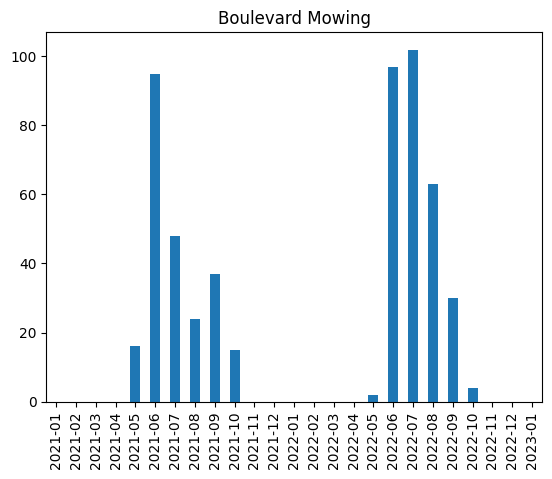

In [11]:
plot_service_by_month(0)
# plot_service_divide_by_overall_in_category(0)
# plot_service_divide_by_month_percentage(0)

You don't mow grass in winter when there is no grass.

### Dog Complaint

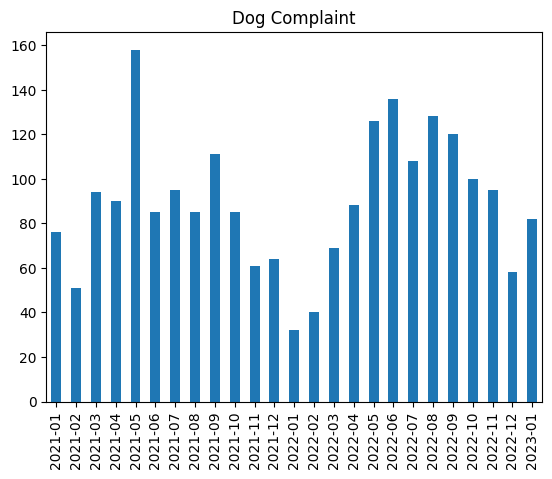

In [12]:
plot_service_by_month(1)

### Frozen Catch Basin

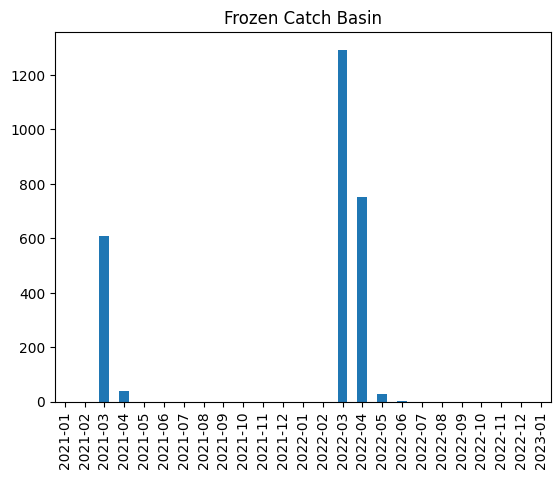

In [13]:
plot_service_by_month(2)

We had a lot of snow last winter, so it's understandable that catch basins are frozen and overwhelmed.

Further verify this by how much cumulative snow we got in the past years

### Graffiti

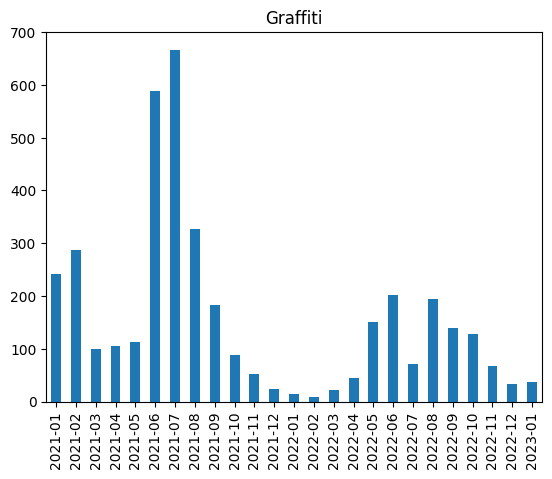

In [14]:
plot_service_by_month(3)

There's a pattern.

People go out in a summer and a comfortable 25C summer night is perfect climate for graffiti. /s

Nobody want's to do graffiti in -30, right?

But that doesn't explain 2021-01 to 2021-02 why there are so many reports, maybe warm winter?

maybe useful, need fact check: Crime rate is higher in the winter, lower in the summer.

- What's happening in July 2022?
- What's wrong with Jan/Feb 2021? COVID policy, frustration? 
- COVID waves? Level of hospitalization vs infection(Omicron vs original COVID)

### Litter Container Complaint

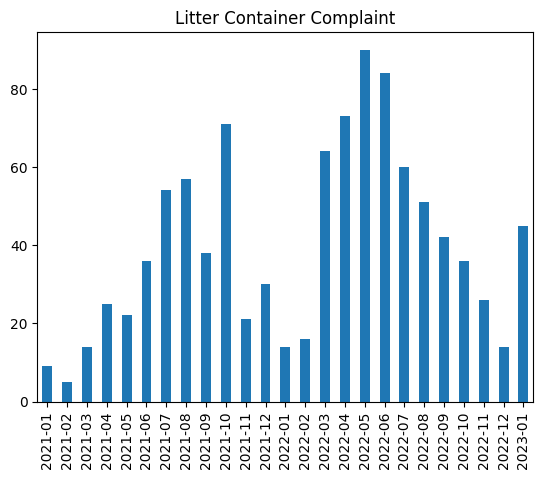

In [15]:
plot_service_by_month(5)

This one matches Carson's hypothesis, garbage smell more in summer, but not in the winter.

### Missed Garbage Collection

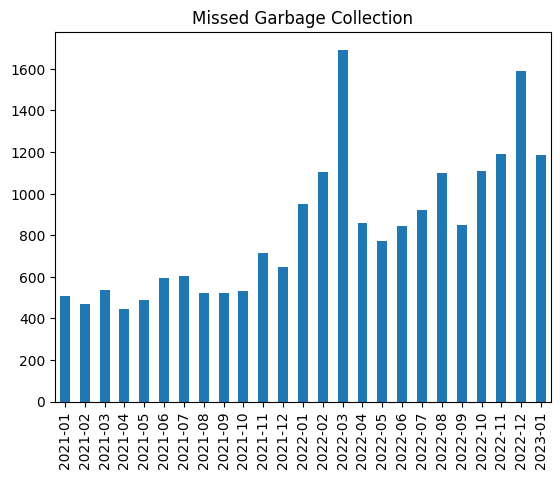

In [16]:
plot_service_by_month(6)

This is interesting.

As discussed with Carson, there maybe more reports on missed garbage collection in summer because it smells, and maybe less on winter because it doesn't smell(people stay inside all of the time, low temps is literally freezing your garbage so nothing could gong bad).

The overall trend is going up. Kind of sad.

But 2 of the peak are in 2022-03 and 2022-12. If you look one year back, from and before 2021-12, the reports are really stable.

Strike?

We need more data to make more out of this, like garbage amounts per month, labour situation, COVID policies, etc.

Residential or industrial, which made more garbage?

### Missed Recycling Collection

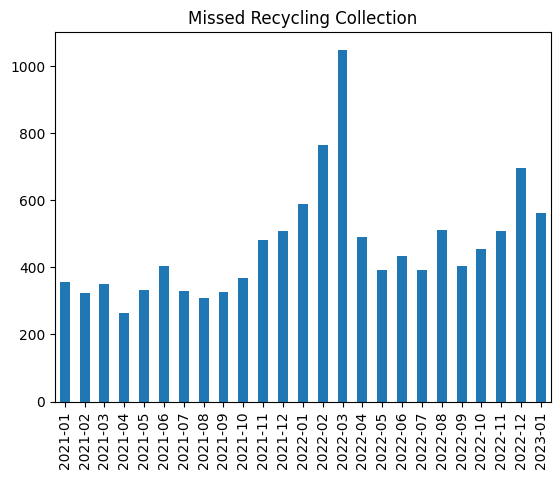

In [17]:
plot_service_by_month(7)

It seems like there's a pattern? COVID is a thing to consider for sure.

### Mosquito Complaint

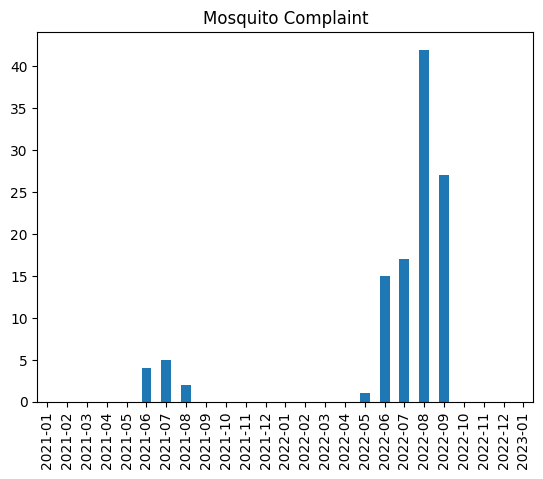

In [18]:
plot_service_by_month(8)

Fuck Mosquitos!

Good thing that mosquito are really sensitive to the temperature. 

But still why 2022 have almost 4x reports than 2021? Does it have something to do with the climate? Or COVID policies?

### Neighbourhood Liveability Complaint

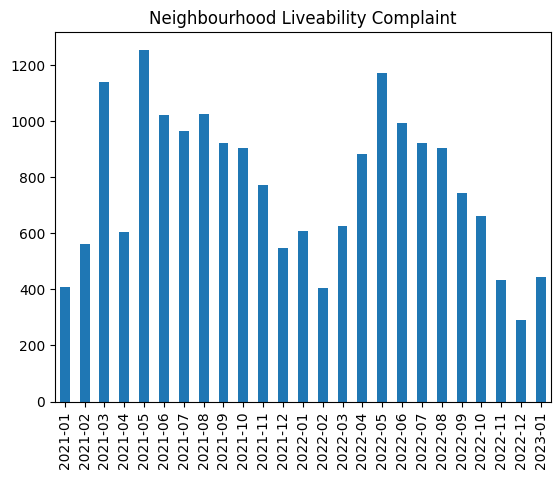

In [19]:
plot_service_by_month(9)

That's a clear pattern, people are more active in the summer.

There was a dip in 2021-04, why? COVID restrictions?

### Potholes

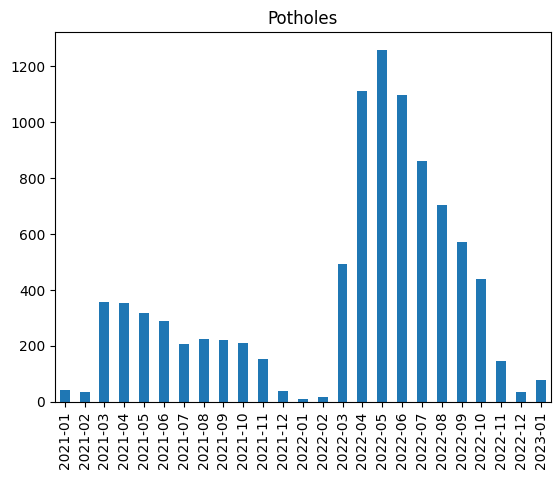

In [20]:
plot_service_by_month(10)

That's a clear pattern, but 2022 was much more dramatic than 2021.

Check weather

### Sanding

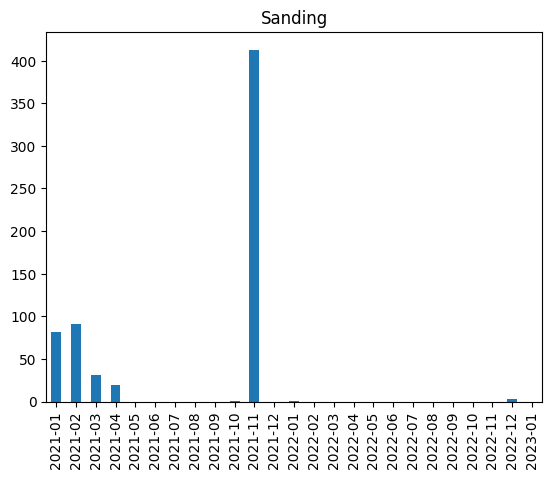

In [21]:
plot_service_by_month(11)

Compare with snow data

Is 2021 warmer?

### Sewer Backup

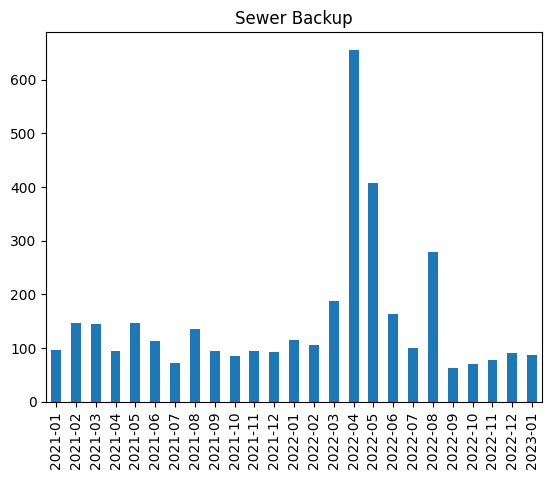

In [22]:
plot_service_by_month(12)

Maybe the water level of Red River have something to do with this?

Probably need some civil engineering help.

### Sidewalk Repairs

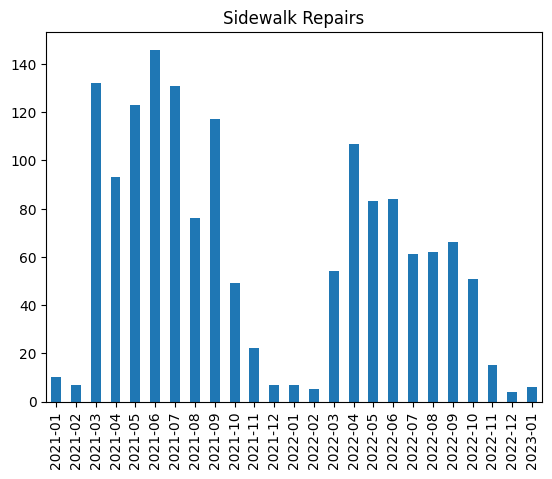

In [23]:
plot_service_by_month(13)

Hmmm that's interesting. As soon as winter come, the reports for sidewalk repairs plummets. I guess that's because nobody wants to walk outside of -30C. Also the snow covers everything, so the snow become the actual road surface.

But there were a lot of snow removal requests for sidewalks. We need to look at where exactly are these snow removal requests originated from. Are they from residential areas? People needs to walk in the neighborhood. Are they from industrial areas like Tuxedo?


### Snow Removal - Roads

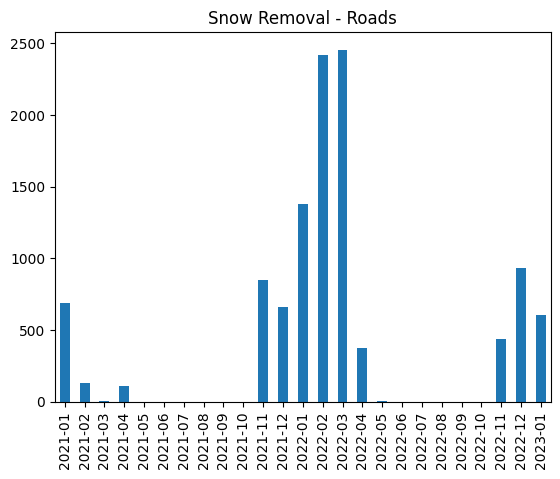

In [24]:
plot_service_by_month(14)

### Snow Removal - Sidewalks

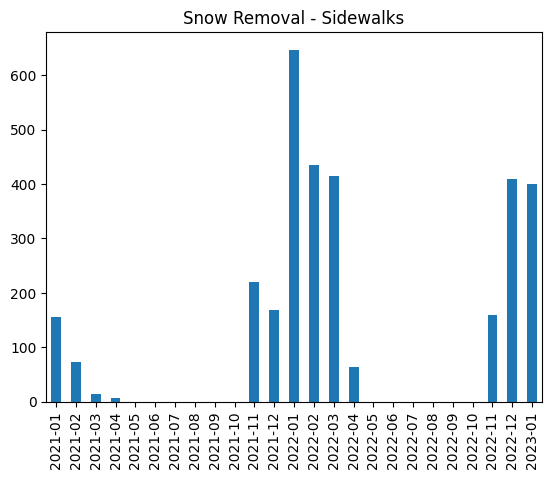

In [25]:
plot_service_by_month(15)

Obviously we don't have snow in the summer, and that's good.

I do remember the Winter of 2021 there were a lot of snows. 

Almost perfect complement with sidewalk repairs

### Tree Pest Caterpillar Complaint

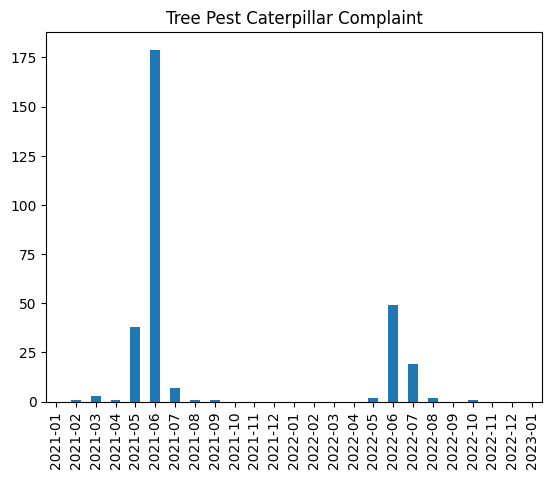

In [26]:
plot_service_by_month(16)

What is this data, they do have a pattern that it's in the summer. There's a big gap between 2021-06 and 2022-06 data.

Note that this is complaint from the Winnipegger to 311, not the actual work dispatched. If we can have that data, that would explain something, like there were not enough people to work on this, and people are making duplicating requests.

Speaking of duplicate, does all of the data here contains duplications or not?

Because of COVIDin 2021, people are bored and looking for caterpillars.

### Water Main Leak

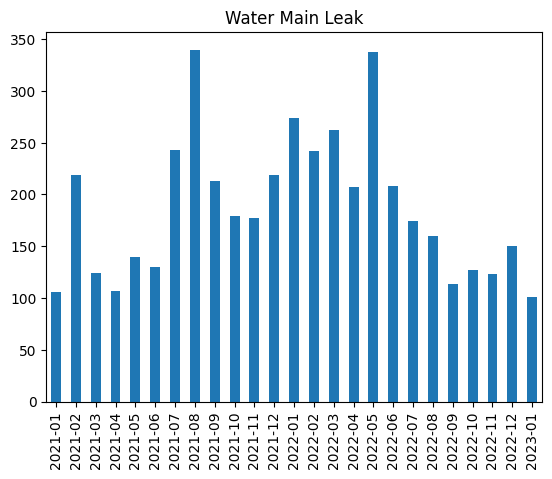

In [27]:
plot_service_by_month(17)

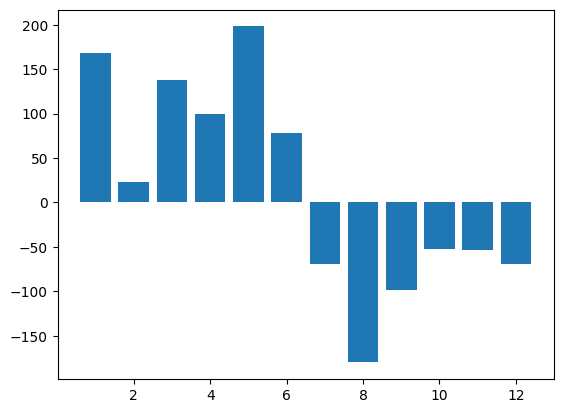

In [28]:
water_main_leak = service_by_month(17)
y2021 = water_main_leak[0:12].to_numpy()
y2022 = water_main_leak[12:24].to_numpy()
plt.bar(range(1, 13), y2022-y2021)
plt.show()

What exactly does this mean?

Maybe the water level of Red River have something to do with this?

I remember one of the summer the water level of red river was really high throughout the whole summer, the sidewalk along the river was completely submerged. That kinds of terrifies me because is that one of the consequences of global warming?

weather and temp related, more in the summer. If that's the case 2021-12 to 2022-03 are odd. Why is that?

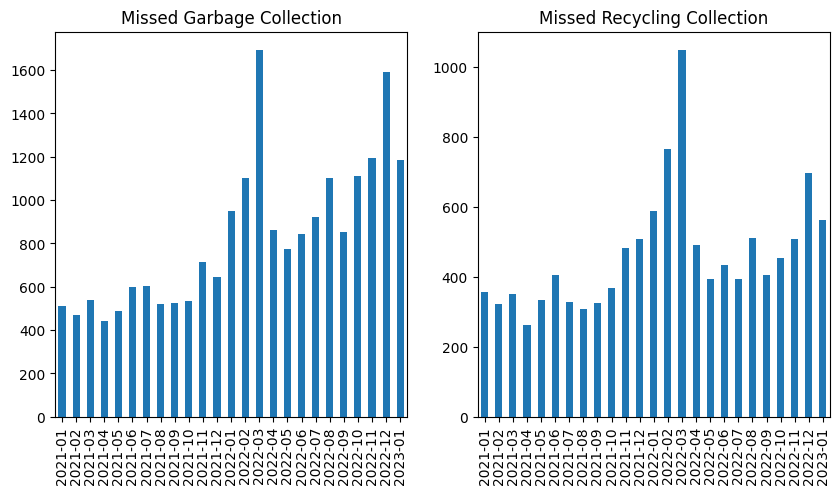

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

plot_service_by_month(6, axs[0])
plot_service_by_month(7, axs[1])
# plot_service_by_month(3,  axs[1][0])
# plot_service_by_month(9,  axs[1][1])
# plot_service_by_month(13, axs[2][0])
# plot_service_by_month(5,  axs[2][1])


# fig.subplots_adjust(hspace=0.35)

plt.show()